In [6]:
import healpy as hp 
import sys
import numpy as np
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.Noise.ncm import NoiseModel

In [3]:
ncm = NoiseModel()

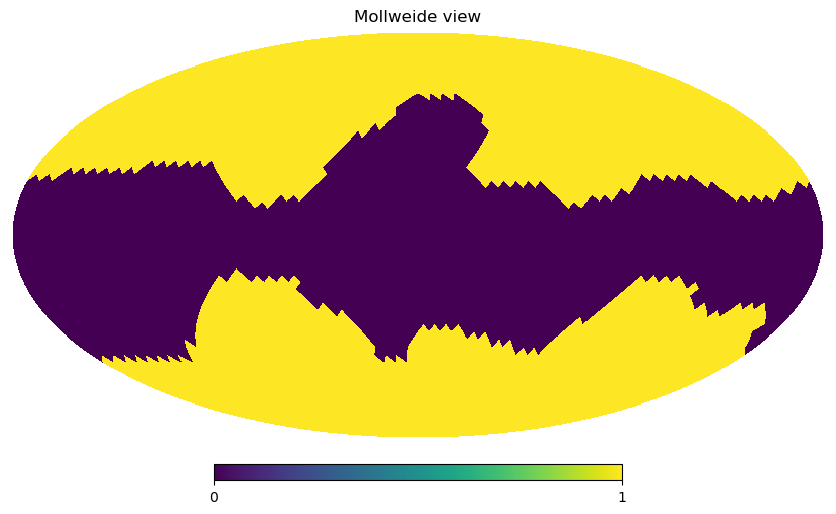

In [4]:
hp.mollview(ncm.polmask)

In [32]:
full = ncm.get_full_ncm(353,pad_temp=True,reshape=True)

In [33]:
full.tofile('/marconi/home/userexternal/aidicher/storage/taunet/ncm_TQU_353.bin')

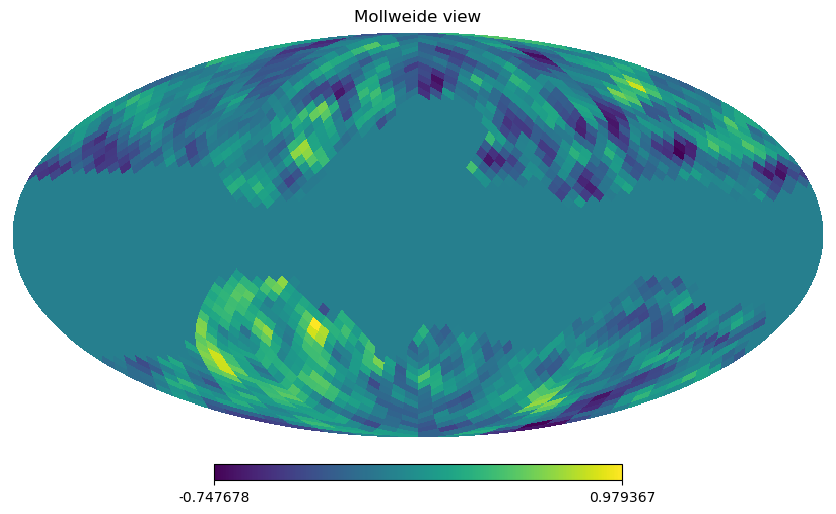

In [7]:
hp.mollview(ncm.noisemap(143))

In [9]:
#(3npix*3npix)
#/marconi_work/INF23_litebird/lpagano0/4anto/ffp8_covmats

In [10]:
mask = ncm.polmask

In [31]:
np.fromfile('/marconi/home/userexternal/aidicher/storage/taunet/ncm_TQU_100.bin').shape

(84934656,)